# **Part 2**


1. Implementation of **LoG blob detection algorithm** to detect flowers in the given flowers.png picture. This part also includes comparison between the method implemented from scratch and the one provided by OpenCV library.
2. Implementation of LoG with **normalized scale variations**.
3. Performance of additional experiments with different **threshold values** for both algorithms.



First of all we will use the library to get an idea of the results that we want to get. We will use the scikit-image library to get the LoG


In [1]:
!pip install scikit-image

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte, feature

In [27]:
def draw_circles(img, blobs, cmap='CMRmap'):
    # the raius is approximate sqrt(2)*sigma

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap=cmap)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='white', linewidth=2, fill=False)
        ax.add_patch(c)


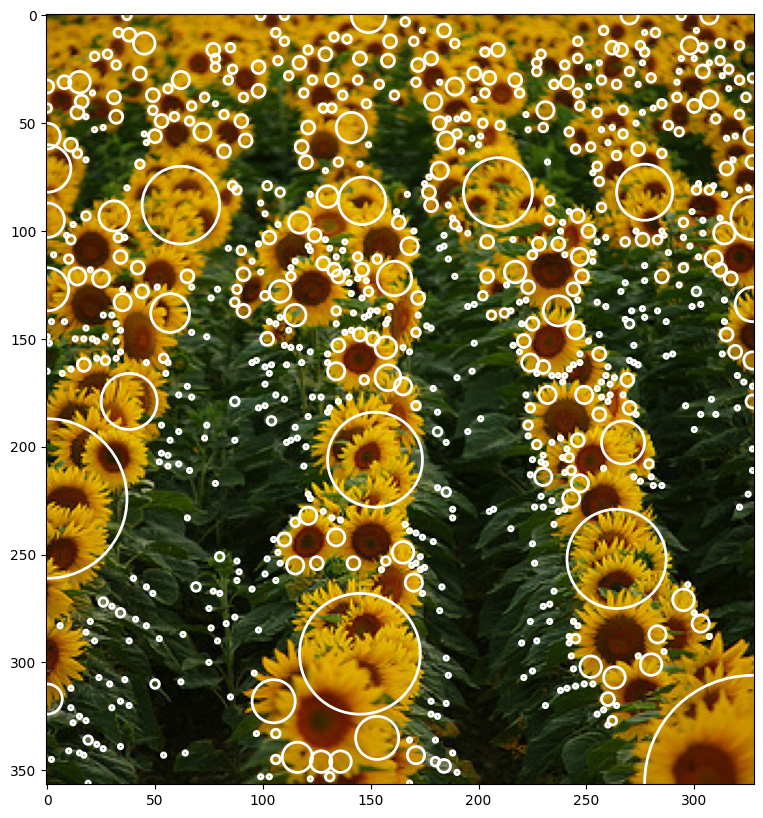

In [30]:
# Read image
img = io.imread('../images/flowers.png')

# Convert to grayscale
img_gray = color.rgb2gray(img)

#io.imshow(img_gray)
res = feature.blob_log(img_gray, min_sigma=1, max_sigma=50, num_sigma=50, threshold=.1, overlap=.5, log_scale=False, exclude_border=False)

# Draw the results
draw_circles(img, res)

Now the difficult part :\)

In [31]:
def LoG(img, sigma):

    pass

def smooth(img, sigma):

    # padding to the image    

    # create a gaussian kernel
    

    # convolve the image with the kernel


    
    pass

def laplacian(img):
    
    pass



In [58]:
def create_gauss_kernel(sigma):
    size = 5
    kernel = np.zeros((size,size))

    for x in range((-5//2)+1,(5//2)+1,1):
        for y in range((-5//2)+1,(5//2)+1,1):
            #kernel[x+2,y+2] = 1/np.pi*sigma**4 * (1-(x**2+y**2)/(2*sigma**2)) * np.exp(-(x**2+y**2)/(2*sigma**2))
            kernel[x+2,y+2] = (((x**2+y**2)-sigma**2) / sigma**4 )* np.exp(-(x**2+y**2)/(2*sigma**2))
    
    print(kernel)

    return kernel


def create_log_kernel():

    

    pass

In [64]:
create_gauss_kernel(1)

[[ 0.12820947  0.32833999  0.40600585  0.32833999  0.12820947]
 [ 0.32833999  0.36787944  0.          0.36787944  0.32833999]
 [ 0.40600585  0.         -1.          0.          0.40600585]
 [ 0.32833999  0.36787944  0.          0.36787944  0.32833999]
 [ 0.12820947  0.32833999  0.40600585  0.32833999  0.12820947]]


[[ 0.12820947  0.32833999  0.40600585  0.32833999  0.12820947]
 [ 0.32833999  0.36787944  0.          0.36787944  0.32833999]
 [ 0.40600585  0.         -1.          0.          0.40600585]
 [ 0.32833999  0.36787944  0.          0.36787944  0.32833999]
 [ 0.12820947  0.32833999  0.40600585  0.32833999  0.12820947]]


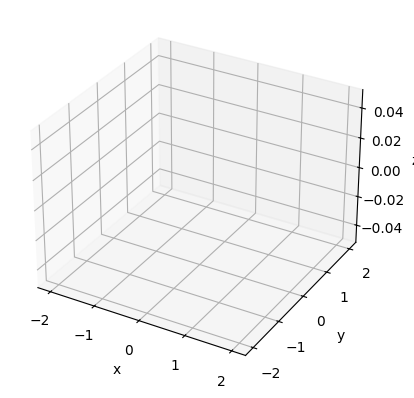

In [66]:
#plot in 3d the graph of the kernel

from mpl_toolkits import mplot3d

kernel = create_gauss_kernel(1)

x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
z = kernel

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

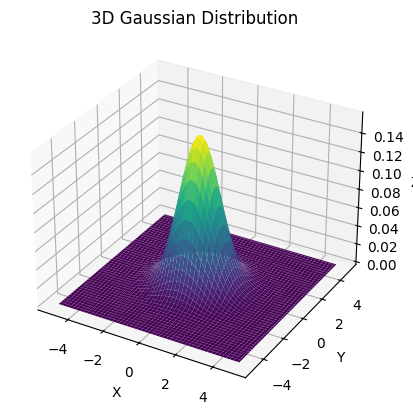

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the Gaussian function
mu_x = 0
mu_y = 0
sigma_x = 1.0
sigma_y = 1.0

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Calculate the Gaussian function values for each x and y
z = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Gaussian Distribution')

plt.show()


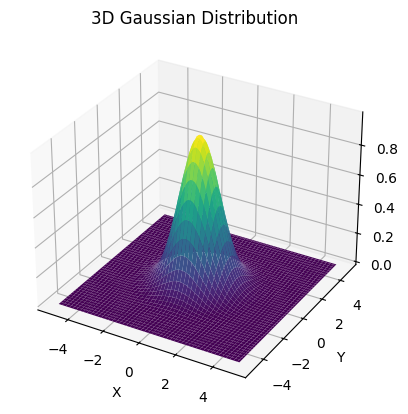

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the Gaussian function
mu_x = 0
mu_y = 0
sigma_x = 1.0
sigma_y = 1.0

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Calculate the Gaussian function values for each x and y
z = np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Gaussian Distribution')

plt.show()


[[-2.17e-10 -2.41e-08 -7.94e-07 -7.92e-06 -2.47e-05 -2.47e-05 -7.92e-06
  -7.94e-07 -2.41e-08 -2.17e-10]
 [-2.41e-08 -2.52e-06 -7.63e-05 -6.98e-04 -2.05e-03 -2.05e-03 -6.98e-04
  -7.63e-05 -2.52e-06 -2.41e-08]
 [-7.94e-07 -7.63e-05 -2.05e-03 -1.59e-02 -4.05e-02 -4.05e-02 -1.59e-02
  -2.05e-03 -7.63e-05 -7.94e-07]
 [-7.92e-06 -6.98e-04 -1.59e-02 -9.02e-02 -1.42e-01 -1.42e-01 -9.02e-02
  -1.59e-02 -6.98e-04 -7.92e-06]
 [-2.47e-05 -2.05e-03 -4.05e-02 -1.42e-01  8.95e-02  8.95e-02 -1.42e-01
  -4.05e-02 -2.05e-03 -2.47e-05]
 [-2.47e-05 -2.05e-03 -4.05e-02 -1.42e-01  8.95e-02  8.95e-02 -1.42e-01
  -4.05e-02 -2.05e-03 -2.47e-05]
 [-7.92e-06 -6.98e-04 -1.59e-02 -9.02e-02 -1.42e-01 -1.42e-01 -9.02e-02
  -1.59e-02 -6.98e-04 -7.92e-06]
 [-7.94e-07 -7.63e-05 -2.05e-03 -1.59e-02 -4.05e-02 -4.05e-02 -1.59e-02
  -2.05e-03 -7.63e-05 -7.94e-07]
 [-2.41e-08 -2.52e-06 -7.63e-05 -6.98e-04 -2.05e-03 -2.05e-03 -6.98e-04
  -7.63e-05 -2.52e-06 -2.41e-08]
 [-2.17e-10 -2.41e-08 -7.94e-07 -7.92e-06 -2.47e-05 -2.

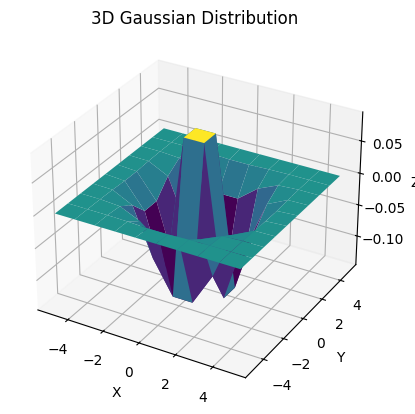

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the Gaussian function
mu_x = 0
mu_y = 0
sigma_x = 1.0
sigma_y = 1.0

# Create a grid of x and y values
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
x, y = np.meshgrid(x, y)

# Calculate the Gaussian function values for each x and y
z = - ((x**2 + y**2 - sigma_x**2) /np.pi*sigma_x**4)* np.exp(-(x**2+y**2)/(2*sigma_x**2))

# print the kernel with only 2 decimals
np.set_printoptions(precision=2)
print(z)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Gaussian Distribution')

plt.show()


In [19]:
# definitions

def gaussian_2d(x, y, A=1, x0=0, y0=0, sigma=1):
    return A * np.exp(-( (x - x0)**2 / (2 * sigma**2) + (y - y0)**2 / (2 * sigma**2)))

def laplacian_2d(x, y, sigma=1):
    return - ((x**2 + y**2 - sigma**2) /np.pi*sigma**4)* np.exp(-(x**2+y**2)/(2*sigma**2))

# Initialize dimensions
n_rows, n_cols = 500,500

# Create a grid of (x, y) values
x, y = np.meshgrid(np.linspace(-5, 5, n_cols), np.linspace(-5, 5, n_rows))



[[1.39e-11 1.53e-11 1.70e-11 ... 1.70e-11 1.53e-11 1.39e-11]
 [1.53e-11 1.70e-11 1.87e-11 ... 1.87e-11 1.70e-11 1.53e-11]
 [1.70e-11 1.87e-11 2.07e-11 ... 2.07e-11 1.87e-11 1.70e-11]
 ...
 [1.70e-11 1.87e-11 2.07e-11 ... 2.07e-11 1.87e-11 1.70e-11]
 [1.53e-11 1.70e-11 1.87e-11 ... 1.87e-11 1.70e-11 1.53e-11]
 [1.39e-11 1.53e-11 1.70e-11 ... 1.70e-11 1.53e-11 1.39e-11]]


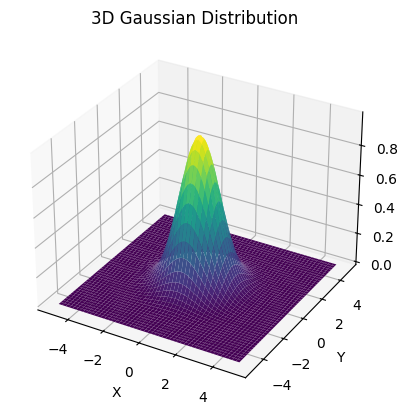

In [20]:
# Calculate Gaussian values for the grid
matrix = gaussian_2d(x, y, sigma=1)

print(matrix)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, matrix, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Gaussian Distribution')

plt.show()


[[-2.17e-10 -2.38e-10 -2.62e-10 ... -2.62e-10 -2.38e-10 -2.17e-10]
 [-2.38e-10 -2.62e-10 -2.89e-10 ... -2.89e-10 -2.62e-10 -2.38e-10]
 [-2.62e-10 -2.89e-10 -3.18e-10 ... -3.18e-10 -2.89e-10 -2.62e-10]
 ...
 [-2.62e-10 -2.89e-10 -3.18e-10 ... -3.18e-10 -2.89e-10 -2.62e-10]
 [-2.38e-10 -2.62e-10 -2.89e-10 ... -2.89e-10 -2.62e-10 -2.38e-10]
 [-2.17e-10 -2.38e-10 -2.62e-10 ... -2.62e-10 -2.38e-10 -2.17e-10]]


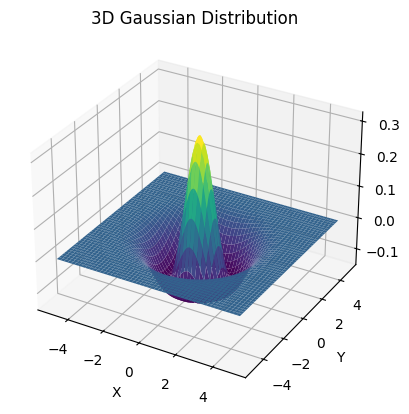

In [21]:
# Calculate Gaussian values for the grid
matrix = laplacian_2d(x, y, sigma=1)

print(matrix)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, matrix, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Gaussian Distribution')

plt.show()